# Part A - Importing and Understand the Data

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
import geopandas as gpd
from sklearn.impute import KNNImputer
from collections import Counter


In [2]:
# Load the zomato_df_fiinal_data.csv dataset
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

In [3]:
# Gives an overview of the dataset (data types, non-null counts)
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [4]:
# Provides summary statistics for numeric features
zomato_df.describe()

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


In [5]:
# Get the shape of the dataset
print(f"Dataset Shape: {zomato_df.shape}")

# Inspect the first three rows of the dataset
print("Dataset Head:")
zomato_df.head(2)

Dataset Shape: (10500, 17)
Dataset Head:


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b


# I. Plots/graphs

## 1.1. How many unique cuisines are served by Sydney restaurants?

Anaswer: There are 134 unique cuisines

In [6]:
# Convert the 'cuisine' column to strings to ensure consistency, handling any non-string values that may be present
zomato_df['cuisine'] = zomato_df['cuisine'].astype(str)

# Clean the 'cuisine' column by:
# 1. Removing any square brackets and quotes to standardize the format
# 2. Splitting the string into a list of individual cuisines based on the comma delimiter
zomato_df['cuisine'] = zomato_df['cuisine'].str.strip("[]").str.replace("'", "").apply(lambda x: x.split(', '))

# Extract and store unique cuisines in a set to avoid duplicates
unique_cuisines = set(cuisine for cuisines_list in zomato_df['cuisine'] for cuisine in cuisines_list)

# Print the total number of unique cuisines identified in the dataset
print(f'Total unique cuisines: {len(unique_cuisines)}')


Total unique cuisines: 134


In [7]:
# Clean the 'cuisine' column by:
# 1. Converting all values to strings to handle any non-string entries.
# 2. Removing square brackets, quotes, and extra spaces around commas using regex.
# 3. Splitting the cleaned strings into lists of individual cuisines.
zomato_df['cuisine'] = zomato_df['cuisine'].astype(str)
zomato_df['cuisine'] = zomato_df['cuisine'].str.replace(r"[\[\]']", "", regex=True).apply(lambda x: x.split(', '))

# Count the occurrences of each unique cuisine using Counter,
# creating a dictionary-like object that maps cuisines to their counts.
cuisine_counts = Counter(cuisine for cuisines_list in zomato_df['cuisine'] for cuisine in cuisines_list)

# Convert the Counter object to a DataFrame for improved readability,
# setting columns for 'Cuisine' and 'Count', and sorting by count in descending order.
cuisine_counts_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

# Print the DataFrame displaying the cleaned cuisine counts for analysis.
print(cuisine_counts_df)


               Cuisine  Count
4                 Cafe   3162
9    Modern Australian    981
13             Chinese    863
21             Italian    820
33               Pizza    744
..                 ...    ...
77               Swiss      1
126              Dutch      1
95                Kiwi      1
118             Syrian      1
133          Ukrainian      1

[134 rows x 2 columns]


<Figure size 1200x1000 with 0 Axes>

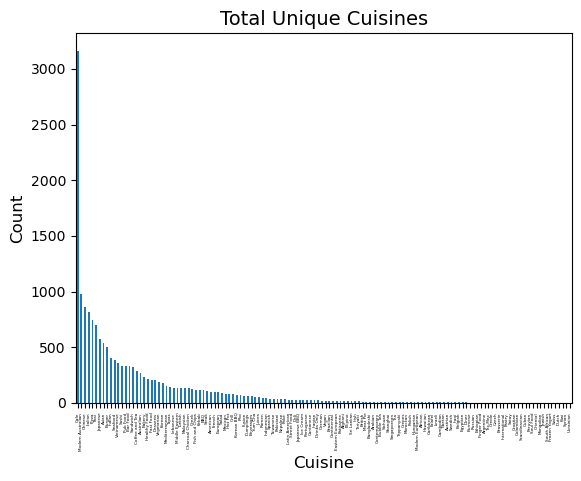

In [8]:
# Create a bar plot to visualize the count of all unique cuisines in the dataset,
# using a larger figure size for better visibility of all entries.
plt.figure(figsize=(12, 10))

# Plot the data as a bar chart, specifying the x and y axes without displaying a legend.
cuisine_counts_df.plot(kind='bar', x='Cuisine', y='Count', legend=False)

# Set the title for the plot with an adjusted font size for clarity.
plt.title('Total Unique Cuisines', fontsize=14)

# Label the x-axis with an adjusted font size to enhance readability.
plt.xlabel('Cuisine', fontsize=12)

# Label the y-axis with an adjusted font size for consistency with the x-axis.
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels for better readability and set a smaller font size
# to accommodate the larger number of cuisines displayed.
plt.xticks(rotation=90, fontsize=3)

# Set the font size for y-axis tick labels for improved visibility.
plt.yticks(fontsize=10)

# Display the plot to visualize the distribution of cuisines.
plt.show()


<Figure size 1000x800 with 0 Axes>

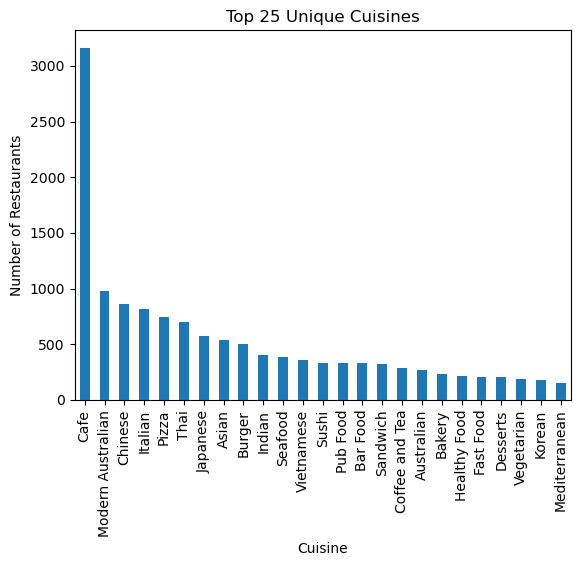

In [9]:
# Convert the 'cuisine' column to strings to ensure data consistency across all entries
zomato_df['cuisine'] = zomato_df['cuisine'].astype(str)

# Clean the 'cuisine' column by:
# 1. Stripping square brackets from the ends of the strings.
# 2. Removing any single quotes to standardize the format.
# 3. Splitting the cleaned strings into lists of individual cuisines based on commas.
zomato_df['cuisine'] = zomato_df['cuisine'].str.strip("[]").str.replace("'", "").apply(lambda x: x.split(', '))

# Use the Counter class to count the occurrences of each unique cuisine.
# This creates a dictionary-like object mapping each cuisine to its count.
cuisine_counts = Counter(cuisine for cuisines_list in zomato_df['cuisine'] for cuisine in cuisines_list)

# Convert the cuisine counts from the Counter into a DataFrame for easier plotting,
# setting up columns for 'Cuisine' and 'Count', and sorting the DataFrame by count in descending order.
cuisine_counts_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 25 cuisines to visualize the most popular cuisines in the dataset,
# ensuring the plot remains readable by limiting the number of cuisines displayed.
plt.figure(figsize=(10, 8))
cuisine_counts_df.head(25).plot(kind='bar', x='Cuisine', y='Count', legend=False)
plt.title('Top 25 Unique Cuisines')  # Title for the plot
plt.xlabel('Cuisine')                  # X-axis label
plt.ylabel('Number of Restaurants')                    # Y-axis label
plt.xticks(rotation=90)                # Rotate x-axis labels for better readability
plt.show()                             # Display the plot


### Plot by Plotly

In [10]:
# Count occurrences of each cuisine by exploding the lists in the 'cuisine' column,
# which separates each cuisine into individual entries and calculates the frequency of each unique cuisine.
cuisine_counts = zomato_df['cuisine'].explode().value_counts()

# Reset the index of the counts to create a DataFrame that organizes the cuisine names and their respective counts.
# The resulting DataFrame will have two columns: one for cuisine names and another for their counts.
cuisine_df = cuisine_counts.reset_index()
cuisine_df.columns = ['Cuisine', 'Count']  # Rename the columns for clarity

# Create a bar plot using Plotly to visualize the total counts of unique cuisines.
# The x-axis will display cuisine names, and the y-axis will represent the number of restaurants for each cuisine.
fig = px.bar(cuisine_df, x='Cuisine', y='Count', title='Total Unique Cuisines',
             labels={'Count': 'Number of Restaurants'}, color='Cuisine')

# Customize the layout of the plot:
# Rotate x-axis labels to 90 degrees for improved readability and set the overall dimensions of the plot.
# Also, set the font size for x-axis labels to 6 for better fit and appearance.
fig.update_layout(xaxis_tickangle=90, height=600, width=1200, 
                  xaxis_tickfont=dict(size=6))  # Set font size for x-axis labels to 6

# Display the plot in an interactive window.
fig.show()


In [11]:
# Count occurrences of each cuisine by exploding the lists in the 'cuisine' column,
# which separates each cuisine into individual entries and counts the frequency of each unique cuisine.
cuisine_counts = zomato_df['cuisine'].explode().value_counts()

# Select the top 25 cuisines based on their occurrence counts and reset the index.
# This creates a new DataFrame with two columns: 'Cuisine' and 'Count'.
top_cuisines_df = cuisine_counts.head(25).reset_index()
top_cuisines_df.columns = ['Cuisine', 'Count']  # Rename the columns for clarity

# Create a bar plot using Plotly to visualize the top 25 unique cuisines.
# The x-axis displays the cuisine names, and the y-axis shows the number of restaurants for each cuisine.
fig = px.bar(top_cuisines_df, x='Cuisine', y='Count', title='Top 25 Unique Cuisines',
             labels={'Count': 'Number of Restaurants'}, color='Cuisine')

# Customize the layout of the plot by rotating the x-axis labels to 90 degrees for better readability.
fig.update_layout(xaxis_tickangle=90)  # Rotate x-axis labels for readability

# Display the plot in an interactive window.
fig.show()


### Plot by Bokeh

In [12]:
# Count occurrences of each cuisine by exploding the lists in the 'cuisine' column
# and using value_counts() to get the frequency of each unique cuisine.
cuisine_counts = zomato_df['cuisine'].explode().value_counts()

# Convert the cuisine counts into a ColumnDataSource, which is a format suitable for Bokeh plots.
# This creates a mapping of cuisines to their respective counts.
source = ColumnDataSource(data=dict(cuisines=cuisine_counts.index, counts=cuisine_counts.values))

# Prepare the output HTML file where the plot will be saved and displayed.
output_file("cuisine_counts_bokeh.html")

# Create a figure for the bar plot, specifying the x-range, height, width, title, and disabling the toolbar.
p = figure(x_range=cuisine_counts.index.tolist(), height=600, width=1200, title="Total Unique Cuisines",
           toolbar_location=None, tools="")

# Add vertical bars to the figure using the data from the ColumnDataSource,
# with 'cuisines' on the x-axis and 'counts' on the y-axis.
p.vbar(x='cuisines', top='counts', width=0.9, source=source)

# Customize the plot appearance:
# Remove the grid lines on the x-axis and set the y-axis starting point to 0.
p.xgrid.grid_line_color = None
p.y_range.start = 0

# Rotate the x-axis labels to 90 degrees for better visibility.
p.xaxis.major_label_orientation = "vertical"  

# Set axis labels for both x and y axes to provide context for the data.
p.xaxis.axis_label = "Cuisines"  # X-axis label indicating the cuisine type
p.yaxis.axis_label = "Number of Restaurants"  # Y-axis label indicating the count of restaurants

# Adjust the font size for the x-axis and y-axis labels to enhance readability.
p.xaxis.major_label_text_font_size = "6pt"  # Smaller font size for x-axis labels
p.yaxis.major_label_text_font_size = "10pt"  # Standard font size for y-axis labels

# Display the plot in the output HTML file.
show(p)


In [13]:
# Count occurrences of each cuisine by exploding the lists in the 'cuisine' column,
# which separates each cuisine into individual entries, and then calculates the frequency of each unique cuisine.
cuisine_counts = zomato_df['cuisine'].explode().value_counts()

# Limit the results to the top 25 cuisines based on their occurrence counts.
top_25_cuisine_counts = cuisine_counts.head(25)

# Convert the top 25 cuisine counts into a ColumnDataSource, which is the format required for Bokeh plots.
# This prepares a mapping of cuisine names to their respective counts for plotting.
source = ColumnDataSource(data=dict(cuisines=top_25_cuisine_counts.index, counts=top_25_cuisine_counts.values))

# Prepare the output HTML file where the Bokeh plot will be saved and displayed.
output_file("top_25_cuisine_counts_bokeh.html")

# Create a figure for the bar plot, specifying the x-range, height, width, title, and disabling the toolbar.
p = figure(x_range=top_25_cuisine_counts.index.tolist(), height=600, width=1200, title="Top 25 Unique Cuisines",
           toolbar_location=None, tools="")

# Add vertical bars to the figure, using 'cuisines' for the x-axis and 'counts' for the height of the bars.
p.vbar(x='cuisines', top='counts', width=0.9, source=source)

# Customize the appearance of the plot:
# Remove the grid lines on the x-axis for a cleaner look and set the y-axis starting point to 0.
p.xgrid.grid_line_color = None
p.y_range.start = 0

# Rotate the x-axis labels to 90 degrees for better visibility of the cuisine names.
p.xaxis.major_label_orientation = "vertical"  

# Set axis labels for both x and y axes to provide clarity on what the data represents.
p.xaxis.axis_label = "Cuisines"  # X-axis label indicating the type of cuisine
p.yaxis.axis_label = "Number of Restaurants"  # Y-axis label indicating the count of restaurants

# Adjust the font size for x and y axis labels for improved readability.
p.xaxis.major_label_text_font_size = "10pt"  # Font size for x-axis labels
p.yaxis.major_label_text_font_size = "10pt"  # Font size for y-axis labels

# Display the plot in the output HTML file for interactive viewing.
show(p)


## 1.2. Which suburbs (top 3) have the highest number of restaurants?

Anaswer: The top 3 suburbs (subzone) are:

1. CBD = 476 restaurants

2. Surry Hills = 260 restaurants

3. Parramatta = 225 restaurants

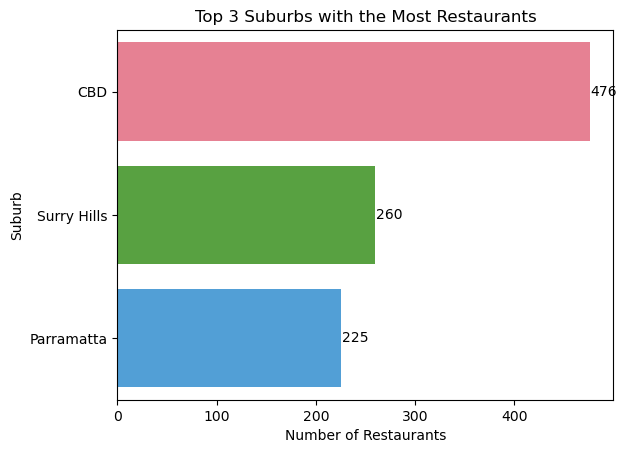

In [14]:
# Get the top 3 suburbs by the number of restaurants by counting occurrences in the 'subzone' column,
# and selecting the top 3 entries. The result is then reset to create a DataFrame with two columns: 
# one for suburb names ('subzone') and another for their respective counts.
top_suburbs = zomato_df['subzone'].value_counts().head(3).reset_index()
top_suburbs.columns = ['subzone', 'count']  # Rename the columns for clarity

# Create a bar plot using Seaborn to visualize the top 3 suburbs, 
# with distinct colors for each bar. The x-axis represents the counts, 
# and the y-axis displays the suburb names. The hue is set to 'subzone' to color the bars differently.
sns.barplot(x='count', y='subzone', data=top_suburbs, hue='subzone', palette="husl", dodge=False, legend=False)

# Set the title of the plot to describe its content.
plt.title('Top 3 Suburbs with the Most Restaurants')

# Name x and y axis
plt.xlabel('Number of Restaurants')  # X-axis label
plt.ylabel('Suburb')  # Y-axis label

# Annotate each bar in the plot with the corresponding count value to provide additional context.
# The text is positioned slightly to the right of the bar by adding 1 to the count value.
for i, value in enumerate(top_suburbs['count']):
    plt.text(value + 1, i, str(value), va='center')  # +1 shifts the text slightly to the right

# Display the plot in an interactive window.
plt.show()


## 1.3. “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not?


For "Poor" rating:

- The number of "Poor" rated restaurants with cost between 0-100: 195

- The number of "Poor" rated restaurants with cost above 100: 6

- For "Poor" rating restaurants, the vast majority (195) are in the lower cost category (0-100), with only a few (6) being more expensive. This suggests that restaurants with poor ratings are generally cheaper.


For "Excellent" rating:

- The number of "Excellent" rated restaurants with cost between 0-100: 37

- The number of "Excellent" rated restaurants with cost above 100: 14

- For "Excellent" rating restaurants, while there are more in the lower cost range (37), a substantial portion (14) are in the higher cost category. This indicates that restaurants with excellent ratings are more likely to be expensive compared to those with poor ratings.


In Conclusion:

- The data and stack barchart support the statement that restaurants with excellent ratings are more likely to be costly, while those with poor ratings are rarely expensive.




In [15]:
# # Define rating_cost_df
rating_cost_df = zomato_df[['rating_text', 'cost']]  # Selecting relevant columns for filtering

# Filter the dataset to include only restaurants with a "Poor" rating.
poor_rating_df = rating_cost_df[rating_cost_df['rating_text'] == 'Poor']

# Create two categories based on cost:
# 1. Count the number of "Poor" rated restaurants with a cost of 100 or less.
# 2. Count the number of "Poor" rated restaurants with a cost greater than 100.
cost_0_to_100 = poor_rating_df[poor_rating_df['cost'] <= 100].shape[0]  # Count for cost 0-100
cost_above_100 = poor_rating_df[poor_rating_df['cost'] > 100].shape[0]  # Count for cost above 100

# Display the results, indicating how many "Poor" rated restaurants fall into each cost category.
print(f"Number of 'Poor' rated restaurants with cost between 0-100: {cost_0_to_100}")
print(f"Number of 'Poor' rated restaurants with cost above 100: {cost_above_100}")


Number of 'Poor' rated restaurants with cost between 0-100: 195
Number of 'Poor' rated restaurants with cost above 100: 6


In [16]:
# Define rating_cost_df
rating_cost_df = zomato_df[['rating_text', 'cost']]  # Selecting relevant columns for filtering
# Filter the dataset to include only restaurants with an "Excellent" rating.
excellent_rating_df = rating_cost_df[rating_cost_df['rating_text'] == 'Excellent']

# Create two categories based on cost:
# 1. Count the number of "Excellent" rated restaurants with a cost of 100 or less.
# 2. Count the number of "Excellent" rated restaurants with a cost greater than 100.
cost_0_to_100_excellent = excellent_rating_df[excellent_rating_df['cost'] <= 100].shape[0]  # Count for cost 0-100
cost_above_100_excellent = excellent_rating_df[excellent_rating_df['cost'] > 100].shape[0]  # Count for cost above 100

# Display the results, indicating how many "Excellent" rated restaurants fall into each cost category.
print(f"Number of 'Excellent' rated restaurants with cost between 0-100: {cost_0_to_100_excellent}")
print(f"Number of 'Excellent' rated restaurants with cost above 100: {cost_above_100_excellent}")


Number of 'Excellent' rated restaurants with cost between 0-100: 37
Number of 'Excellent' rated restaurants with cost above 100: 14


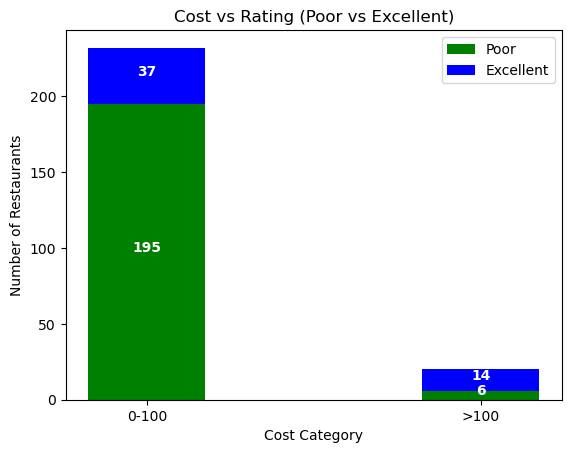

In [17]:
# Assuming the data is structured into two cost categories: 0-100 and greater than 100,
# create lists to store the number of 'Poor' and 'Excellent' rated restaurants for each cost category.
poor_cost_data = [cost_0_to_100, cost_above_100]  # Number of 'Poor' rated restaurants
excellent_cost_data = [cost_0_to_100_excellent, cost_above_100_excellent]  # Number of 'Excellent' rated restaurants

# Define the cost categories for labeling the x-axis.
categories = ['0-100', '>100']

# Set the width of the bars in the plot.
bar_width = 0.35

# Create an index for the categories to position the bars on the x-axis.
index = np.arange(len(categories))

# Create a new figure and axis for the bar plot.
fig, ax = plt.subplots()

# Plot the bars for 'Poor' rated restaurants, using blue color for representation.
bar_poor = ax.bar(index, poor_cost_data, bar_width, label='Poor', color='green')

# Plot the bars for 'Excellent' rated restaurants, stacked on top of the 'Poor' bars, using green color.
bar_excellent = ax.bar(index, excellent_cost_data, bar_width, label='Excellent', color='blue', bottom=poor_cost_data)

# Annotate the 'Poor' bars with their respective counts, placing the text in the center of each bar.
for i, value in enumerate(poor_cost_data):
    ax.text(i, value / 2, str(value), ha='center', color='white', weight='bold')

# Annotate the 'Excellent' bars with their respective counts, placing the text above the 'Poor' bars.
for i, (value_poor, value_excellent) in enumerate(zip(poor_cost_data, excellent_cost_data)):
    ax.text(i, value_poor + value_excellent / 2, str(value_excellent), ha='center', color='white', weight='bold')

# Customize the plot with labels and title for clarity.
ax.set_xlabel('Cost Category')  # Label for the x-axis
ax.set_ylabel('Number of Restaurants')  # Label for the y-axis
ax.set_title('Cost vs Rating (Poor vs Excellent)')  # Title for the plot
ax.set_xticks(index)  # Set the x-ticks to the defined index
ax.set_xticklabels(categories)  # Set the x-tick labels to the cost categories
ax.legend()  # Add a legend to identify the bars

# Display the plot to visualize the comparison between cost categories and restaurant ratings.
plt.show()


# II. Exploration Data Analysis

## 2.1. Plot and description of "Cost" variable

Cost Summary:
count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


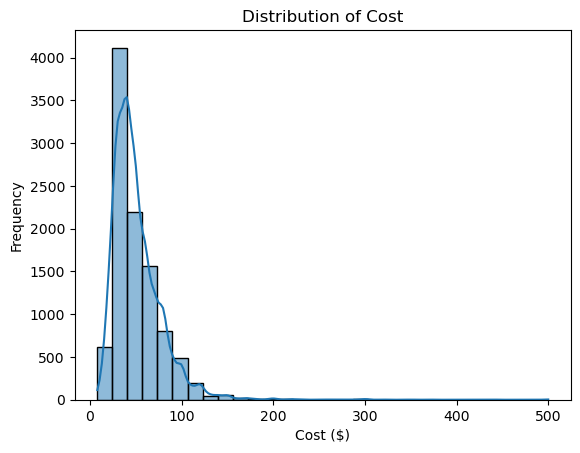

In [18]:
# Descriptive statistics for 'Cost'
cost_summary = zomato_df['cost'].describe()
print("Cost Summary:")
print(cost_summary)

# Plot histogram for 'Cost'
sns.histplot(zomato_df['cost'].dropna(), bins=30, kde=True)
plt.title('Distribution of Cost')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')
plt.show()


## 2.2. Plot and description of "Rating" variable

This code illustrates the summary of Rating variable without dropping/cleaning NA values.

Rating Summary:
rating_text
Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: count, dtype: int64


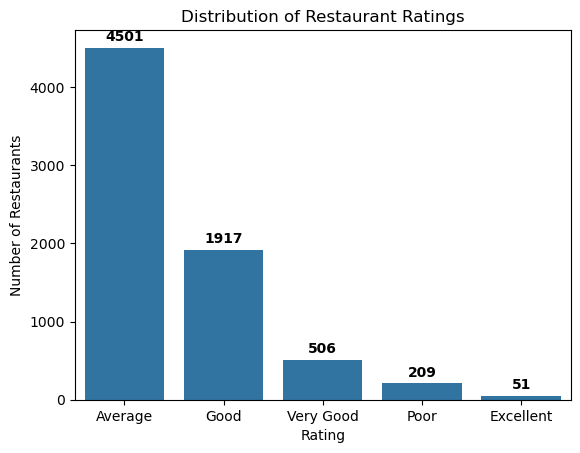

In [19]:
# Descriptive statistics for 'Rating'
rating_summary = zomato_df['rating_text'].value_counts()
print("Rating Summary:")
print(rating_summary)

# Create a count plot using Seaborn to visualize the distribution of restaurant ratings.
# The x-axis represents different rating categories, ordered by their frequency.
sns.countplot(data=zomato_df, x='rating_text', order=rating_summary.index)

# Annotate the bars with their corresponding counts for better readability.
# The count is placed slightly above each bar to avoid overlap.
for i, count in enumerate(rating_summary):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', color='black', weight='bold')

# Set the title and axis labels for the plot to provide context.
plt.title('Distribution of Restaurant Ratings')  # Title for the plot
plt.xlabel('Rating')  # Label for the x-axis
plt.ylabel('Number of Restaurants')  # Label for the y-axis

# Display the plot to visualize the distribution of restaurant ratings.
plt.show()


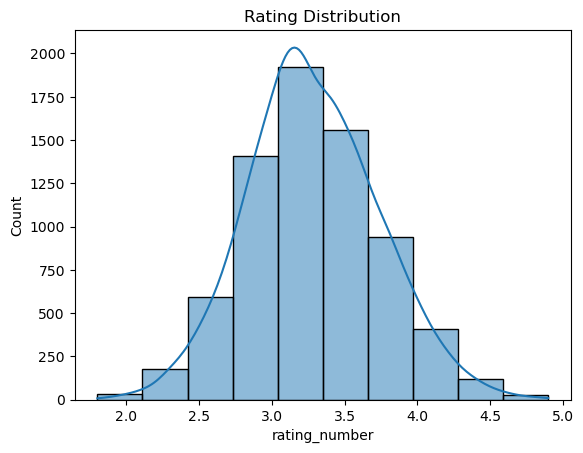

In [20]:
# Create a histogram to visualize the distribution of restaurant ratings using Seaborn.
# The 'rating_number' column is plotted with 30 bins to represent the frequency of different rating values.
# The 'kde=True' parameter adds a Kernel Density Estimate curve to provide a smooth representation of the distribution.
sns.histplot(zomato_df['rating_number'], bins=10, kde=True)

# Set the title of the plot to describe the data being visualized.
plt.title('Rating Distribution')

# Display the plot to visualize the distribution of restaurant ratings.
plt.show()

## 2.3. Plot and description of "Type" variable

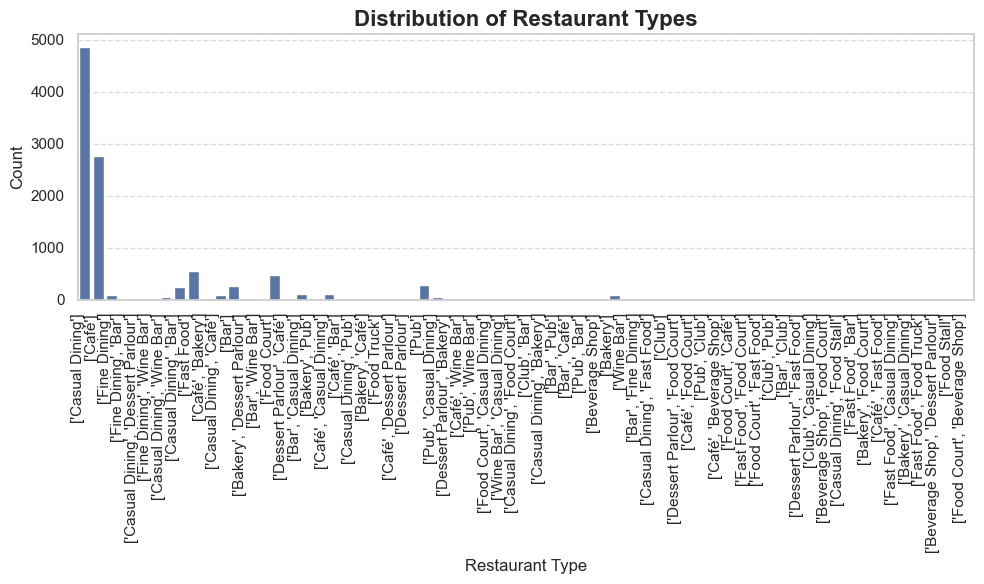

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more appealing style
sns.set(style="whitegrid")

# Plot a barplot to visualize the distribution of 'type'
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=zomato_df)

# Set the title and labels
plt.title('Distribution of Restaurant Types', fontsize=16, fontweight='bold')
plt.xlabel('Restaurant Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add gridlines to the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


## 3. Produce Cuisine Density Map:

### Produce input map

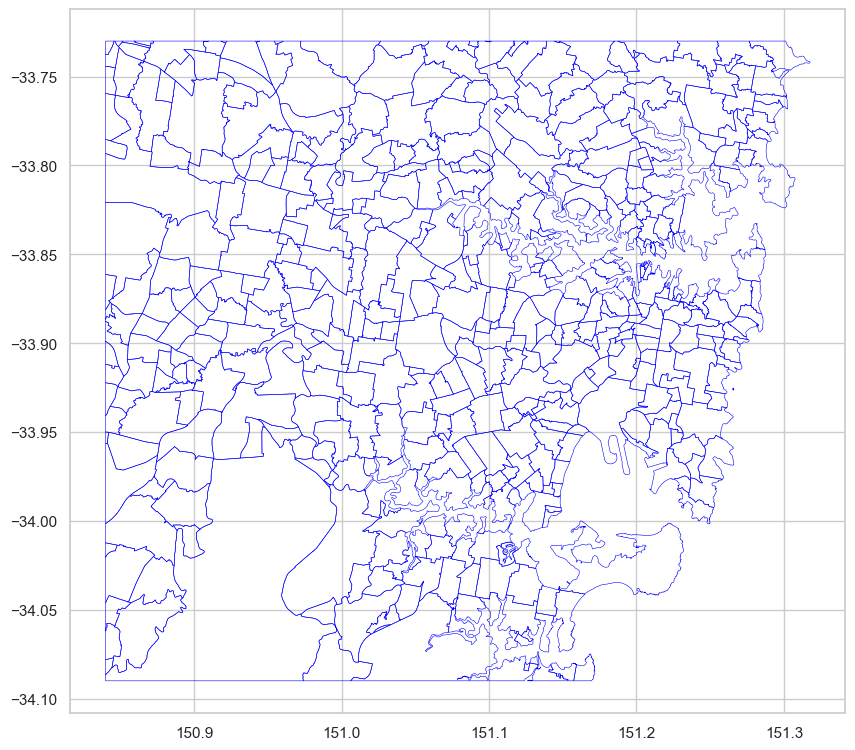

In [22]:
# Load the GeoJSON file containing Sydney suburb boundaries into a GeoDataFrame.
sydney_suburbs = gpd.read_file('../data/sydney.geojson')

# Load the Zomato dataset containing restaurant data into a DataFrame.
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

# Create a plot with a white background and blue borders
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='white')  # Set background to white
sydney_suburbs.boundary.plot(ax=ax, linewidth=0.4, edgecolor='blue')  # Set border color to blue

# Display the plot
plt.show()

### Produce Chinese restaurant density map

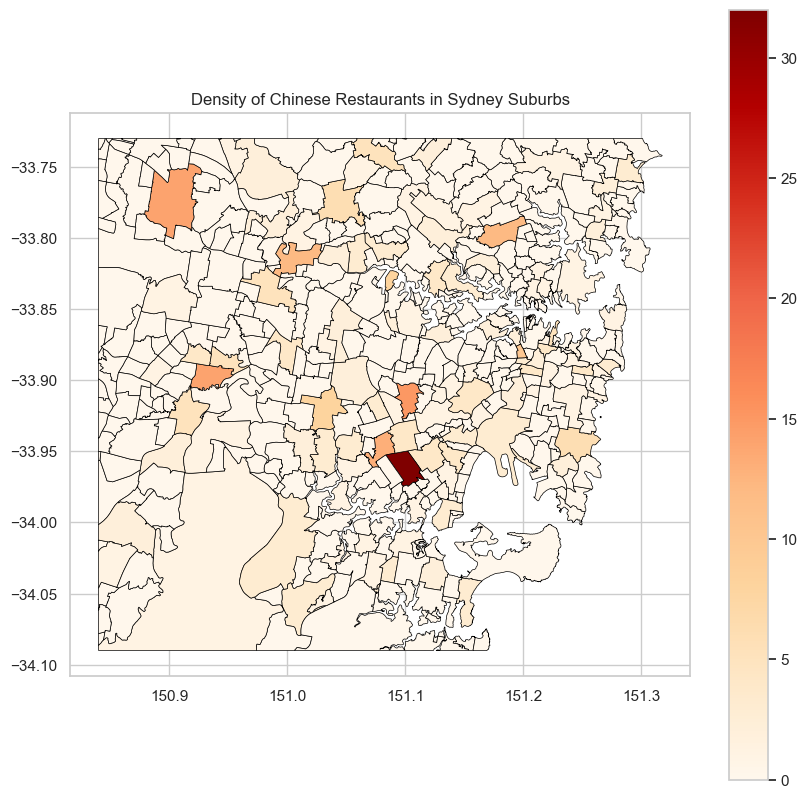

In [23]:
# Load the GeoJSON file containing Sydney suburb boundaries into a GeoDataFrame.
sydney_suburbs = gpd.read_file('../data/sydney.geojson')

# Load the Zomato dataset containing restaurant data into a DataFrame.
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

# Create a GeoDataFrame for the Zomato dataset by converting latitude and longitude into geometric points.
# Set the coordinate reference system (CRS) to EPSG:4326, which is standard for geographic coordinates.
zomato_geo = gpd.GeoDataFrame(zomato_df, geometry=gpd.points_from_xy(zomato_df.lng, zomato_df.lat), crs="EPSG:4326")

# Perform a spatial join to associate each restaurant with its corresponding suburb.
# The "within" predicate ensures that only restaurants located inside the suburb boundaries are included.
restaurants_in_suburbs = gpd.sjoin(zomato_geo, sydney_suburbs, how="inner", predicate="within")

# Clean and filter the cuisine data to remove brackets and quotes from the 'cuisine' column.
# Extract Chinese restaurants by checking if 'cuisine' contains the word 'Chinese', ignoring case.
restaurants_in_suburbs['cuisine'] = restaurants_in_suburbs['cuisine'].str.strip("[]").str.replace("'", "")
chinese_restaurants = restaurants_in_suburbs[restaurants_in_suburbs['cuisine'].str.contains('Chinese', case=False)]

# Group the filtered Chinese restaurants by suburb and count the number of restaurants in each suburb.
chinese_density = chinese_restaurants.groupby('subzone').size().reset_index(name='count')

# Merge the count of Chinese restaurants back into the suburb GeoDataFrame using the suburb names.
sydney_suburbs = sydney_suburbs.merge(chinese_density, how="left", left_on="SSC_NAME", right_on="subzone")

# Replace NaN values in the 'count' column with 0, indicating no Chinese restaurants in those suburbs.
sydney_suburbs['count'] = sydney_suburbs['count'].fillna(0)

# Create a plot of the Sydney suburb map, color-coded by the number of Chinese restaurants in each suburb.
# Use a colormap ('OrRd') to visually represent the density, with edges colored black for clarity.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sydney_suburbs.plot(column='count', ax=ax, legend=True, cmap='OrRd', edgecolor='black', linewidth=0.5)

# Set the title of the plot to provide context on what the visualization represents.
plt.title('Density of Chinese Restaurants in Sydney Suburbs')

# Display the plot to visualize the data.
plt.show()


### Produce Indian restaurant density map

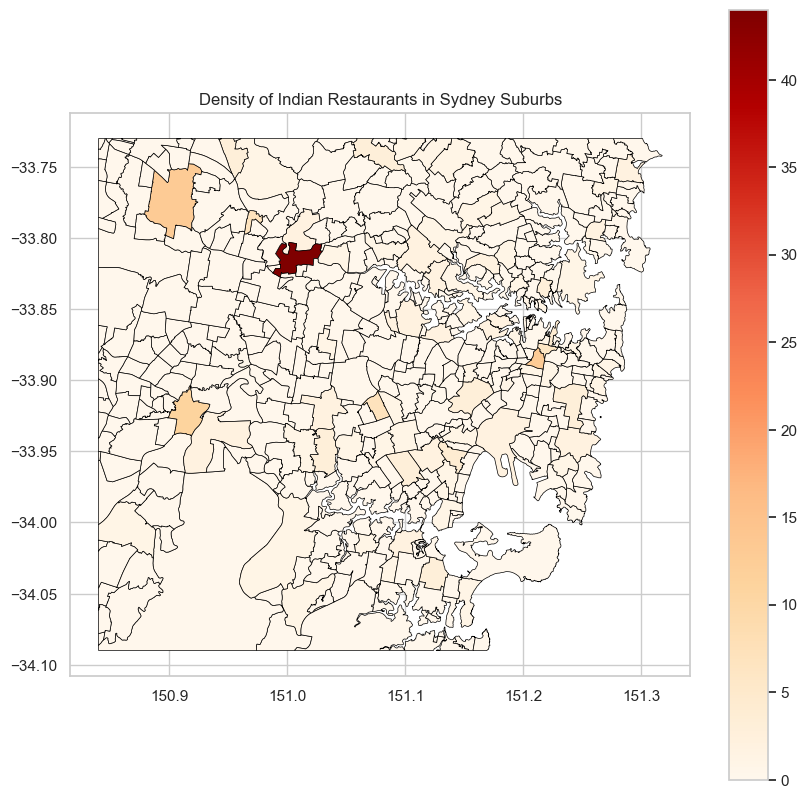

In [24]:
# Load the GeoJSON file containing Sydney suburb boundaries into a GeoDataFrame.
sydney_suburbs = gpd.read_file('../data/sydney.geojson')

# Load the Zomato dataset containing restaurant data into a DataFrame.
zomato_df = pd.read_csv('../data/zomato_df_final_data.csv')

# Create a GeoDataFrame for the Zomato dataset by converting latitude and longitude into geometric points
zomato_geo = gpd.GeoDataFrame(zomato_df, geometry=gpd.points_from_xy(zomato_df.lng, zomato_df.lat), crs="EPSG:4326")

# Perform a spatial join to associate each restaurant with its corresponding suburb
restaurants_in_suburbs = gpd.sjoin(zomato_geo, sydney_suburbs, how="inner", predicate="within")

# Clean and filter the cuisine data to remove brackets and quotes from the 'cuisine' column
# Extract Indian restaurants by checking if 'cuisine' contains the word 'Indian', ignoring case
restaurants_in_suburbs['cuisine'] = restaurants_in_suburbs['cuisine'].str.strip("[]").str.replace("'", "")
indian_restaurants = restaurants_in_suburbs[restaurants_in_suburbs['cuisine'].str.contains('Indian', case=False)]

# Group the filtered Indian restaurants by suburb and count the number of restaurants in each suburb
indian_density = indian_restaurants.groupby('subzone').size().reset_index(name='count')

# Merge the count of Indian restaurants back into the suburb GeoDataFrame using the suburb names
sydney_suburbs = sydney_suburbs.merge(indian_density, how="left", left_on="SSC_NAME", right_on="subzone")

# Replace NaN values in the 'count' column with 0, indicating no Indian restaurants in those suburbs
sydney_suburbs['count'] = sydney_suburbs['count'].fillna(0)

# Create a plot of the Sydney suburb map, color-coded by the number of Indian restaurants in each suburb
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sydney_suburbs.plot(column='count', ax=ax, legend=True, cmap='OrRd', edgecolor='black', linewidth=0.5)

# Set the title of the plot to provide context on what the visualization represents
plt.title('Density of Indian Restaurants in Sydney Suburbs')

# Display the plot to visualize the data
plt.show()


## Summary Report: Analysis of Sydney's Restaurant Data

### Overview
This report explores a dataset containing details about 10,500 restaurants in Sydney, Australia. The data includes information such as restaurant addresses, the type of cuisine offered, ratings, costs, and location coordinates. The goal is to understand trends in the restaurant scene, including popular cuisines, restaurant distribution across suburbs, and how cost relates to ratings.

Numeric Variables:
These are variables that hold continuous or numerical data:

1. cost (Cost of the meal)
2. lat (Latitude of the restaurant location)
3. lng (Longitude of the restaurant location)
4. rating_number (Numeric representation of restaurant rating)
5. votes (Number of votes)
6. cost_2 (A second cost-related feature)

Categorical Variables:
These are variables that represent categories or labels:

1. address (Restaurant address)
2. cuisine (Type of cuisine offered)
3. link (Link to the restaurant page)
4. phone (Restaurant phone number)
5. rating_text (Text representation of the rating: Poor, Average, Good, etc.)
6. subzone (Suburb where the restaurant is located)
7. title (Restaurant title or name)
8. type (Restaurant type: dine-in, takeaway, etc.)
9. groupon (Boolean indicating if the restaurant has a Groupon deal)
10. color (Color representation, possibly for a category)
11. cuisine_color (Color representation based on cuisine type)

Target Variable:
This is the variable you're trying to predict or classify:

1. rating_number (The numeric rating of the restaurant, which can be used for regression or classification tasks)

### Key Insights
Popular CuisinesT
The dataset reveals that Sydney’s restaurants offer a diverse range of cuisines, with 134 unique types identified. Some of the most common cuisines are:

Cafe: found in 3,162 restaurants
Modern Australian: 981 restaurants
Chinese: 863 restaurants
2.2 Suburbs with the Most Restaurants
Three suburbs stand out in terms of the number of restaurants:

Sydney CBD: Home to 476 restaurants
Surry Hills: 260 restaurants
Parramatta: 225 restaurants
These areas are major food hubs, drawing in a significant number of dining spots.

### Cost vs. Ratings
A closer look at restaurant ratings and their costs shows a clear trend:

Restaurants with poor ratings (1-2 stars) tend to be cheaper, with most costing less than $100.
Restaurants with excellent ratings (4-5 stars) are more likely to be expensive, with many charging over $100.
This pattern suggests that higher-rated restaurants generally come with a higher price tag, while poorly rated places are more budget-friendly.

### Distribution of Costs and Ratings
Cost: The average cost for a meal at these restaurants is around $51, with most falling between $30 and $60.
Ratings: The majority of restaurants are rated as either Average or Good, with fewer restaurants achieving "Excellent" status.

## Geospatial Insights
We also mapped out where specific types of restaurants are concentrated in Sydney. Two maps were created:

Chinese Restaurants: The map shows where Chinese restaurants are most densely located across the suburbs.
Indian Restaurants: Similar to the Chinese map, but focusing on the distribution of Indian restaurants.
These maps help highlight which areas have more of a certain cuisine, providing a visual understanding of food availability across the city.

## Visualizations
To help better understand the data, several charts and graphs were created:

Bar charts showing the number of unique cuisines and which suburbs have the most restaurants.
Histograms that illustrate the distribution of restaurant costs and ratings.
A stacked bar chart comparing the costs of restaurants with poor versus excellent ratings.
Geospatial maps showing the density of Chinese and Indian restaurants across Sydney’s suburbs.

## Conclusion
This analysis provided some interesting takeaways about Sydney’s restaurant scene. There’s a rich variety of cuisines available, with cafes being the most common. Higher-rated restaurants tend to be more expensive, while cheaper spots often have lower ratings. Finally, visualizing the data on maps gave us a clear view of where certain types of food are most concentrated in the city.